In [1]:
library(FRACTION)
library(tidyverse)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Exercise 1 - Discrete random variable

1) write the R probability functions for the probability density and cumulative distribution functions,
following the R naming convention

In [2]:
d.myprob <- function(k){
    p <- numeric(length(k))
    p[is.wholenumber(k) & (k>0) & (k<6)] = k[is.wholenumber(k) & (k>0) & (k<6)]/15
    return(p)
}

p.myprob <- function(k){
    return(cumsum(d.myprob(k)))
}

2) produce two plots showing the pdf and cdf, separately

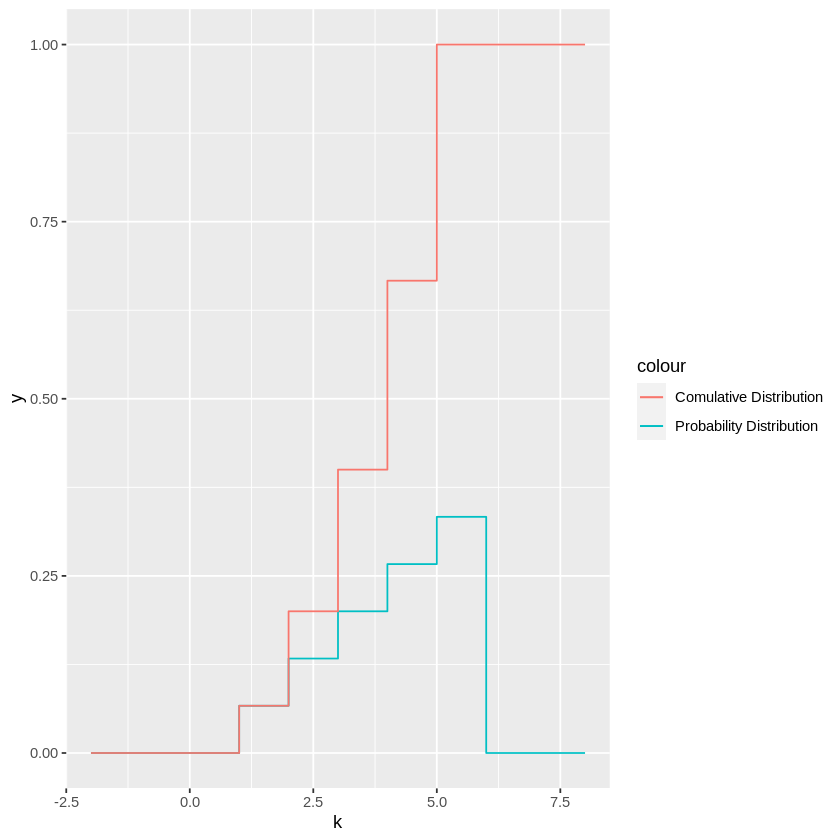

In [3]:
k = -2:8
dat = data.frame(x = k, y = d.myprob(k), z=p.myprob(k))

ggplot()+   geom_step(data=dat, aes(x = k, y = y, color='Probability Distribution'))+
            geom_step(data=dat, aes(x = k, y = z, color='Comulative Distribution'))

3) compute, using R, the mean value and variance of the probability distribution

In [4]:
k = 1:5
avg = sum(k*d.myprob(k))
var = sum(k*k*d.myprob(k))
cat('Distribution mean = ', avg, '\n')
cat('Distribution varince = ', var)

Distribution mean =  3.666667 
Distribution varince =  15

4) compute, using R, the expected value E [k (6 − k)]

In [5]:
func = function(k){return(k*(k-6))}

avg.func = sum(func(k)*d.myprob(k))
cat('E[ k(k-6) ] = ', avg.func)

E[ k(k-6) ] =  -7

5) write the R function that allows to sample random numbers from the probability distribution

In [6]:
r.myprob = function(k, N){
    
    left=p.myprob(k)-d.myprob(k)
    right=p.myprob(k)
    r = c()
    for (x in 1:N) {
        u=runif(1)
        r=append(r, k[u > left & u<=right])
    }
    return(r)
}

6) using the implemented function (point (5)), sample 105 random numbers from this distribution and
plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize
properly the plots with random numbers)

In [7]:
x = r.myprob(k, 100000)
df = data.frame(samples = x)

In [8]:
k = 1:5
dat = data.frame(x = k, y = d.myprob(k), z=p.myprob(k))

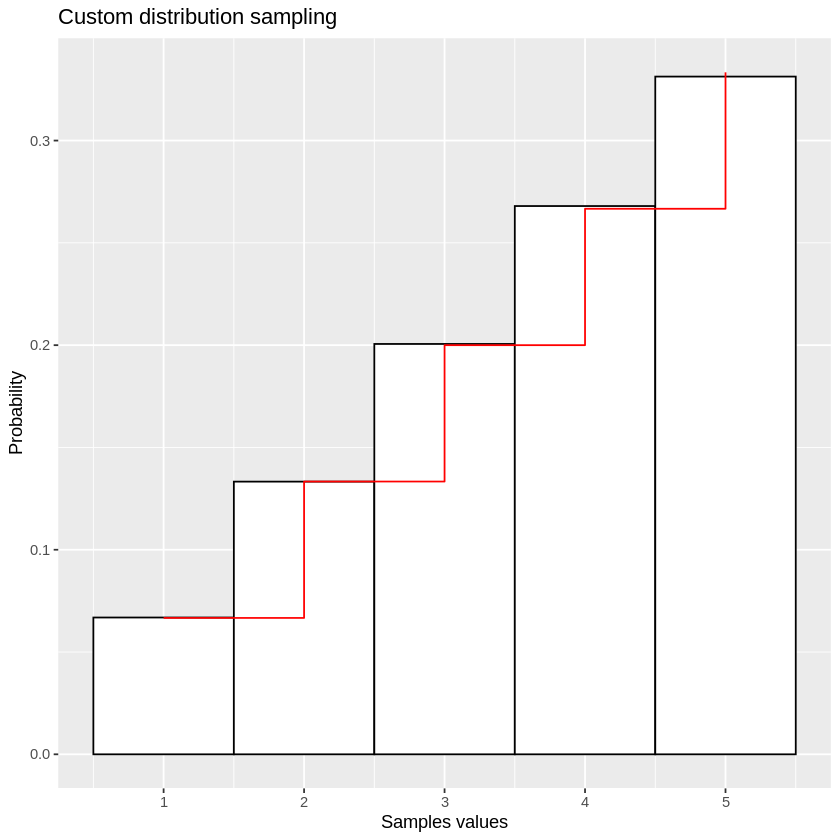

In [9]:
ggplot() + 
    geom_histogram(data=df, aes(x=samples, y=after_stat(density)),color="black", fill="white", binwidth=1)+
    labs(title='Custom distribution sampling', x='Samples values', y='Probability')+
    geom_step(data=dat, aes(x = k, y = y), color='red')

# Exercise 2 - Continuous random variable

In [10]:
dtriang = function(x, a, c, b){
    
    func = ifelse(x>=a & x<c, 2*(x-a)/((b-a)*(c-a)),
                  ifelse(x>=c & x<b, 2*(b-x)/((b-a)*(b-c)),
                         0))
    return(func)
}

ptriang = function(x, a, c, b){
    f = (c-a)*dtriang(c, a, c, b)/2
    int = ifelse(x<a, 0,
                 ifelse(x>=a & x<c, (x-a)*dtriang(x, a, c, b)/2,
                        ifelse(x>=c & x<b, f + (f+dtriang(x, a, c, b))*(x-c)/2,1)))
    return(int)
}

a) plot the function, given the interval (a, b)

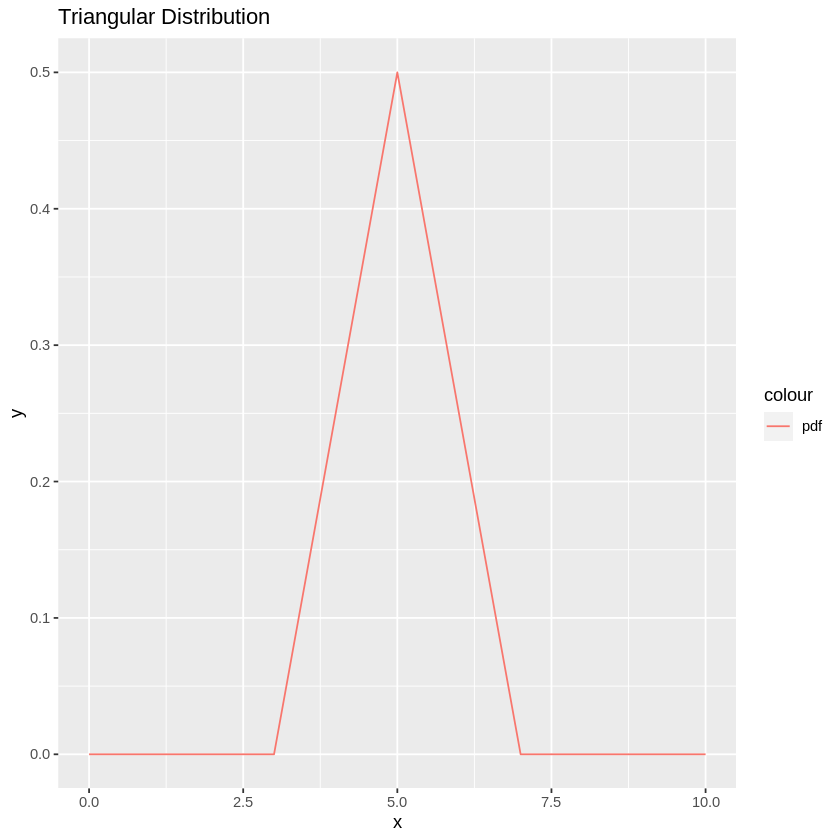

In [11]:
p = dtriang(seq(0, 10, by=0.1), a=3, c=5, b=7)
c = ptriang(seq(0, 10, by=0.1), a=3, c=5, b=7)

df = data.frame(x = seq(0, 10, by=0.1), y =p , z=c)
df |> ggplot() + geom_line(aes(x=x, y=y, color='pdf'))+
    labs(title='Triangular Distribution', x='x')

b) and write an algorithm to generate random numbers from the triangular distribution

In [12]:
striang=function(a, c, b, M, N){
    s = c()
    while(length(s) != N){
        u1 = runif(1)
        u2 = runif(1)
        x1 = a + (b-a)*u1

        if(dtriang(x1, a, c, b)>M*u2){
            s = append(s, x1)
        }
    }
    return(s)
}

c) generate 104 random number from the distribution, show them in an histogram and superimpose
the analytical curve

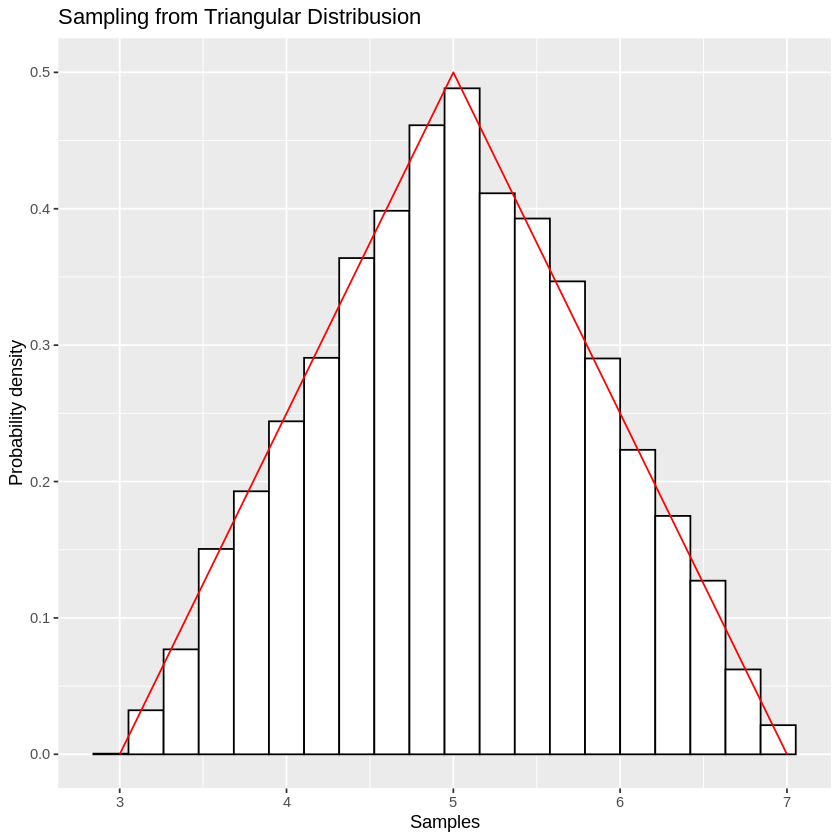

In [13]:
samples = striang(3, 5, 7, 0.5, 10000)
dat = data.frame(x = samples)

p = dtriang(seq(3, 7, by=0.1), a=3, c=5, b=7)
df = data.frame(x = seq(3, 7, by=0.1), y=p)
ggplot() + 
    geom_histogram(data=dat, aes(x=x, y=after_stat(density)),color="black", fill="white", bins = 20)+
    geom_line(data=df, aes(x=x, y=y), color='red')+
    labs(title='Sampling from Triangular Distribusion', y='Probability density', x='Samples')

# Exercise 3
• the waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an
exponential pdf with rate 1/30

In [14]:
lambda = 1/30

A) simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram

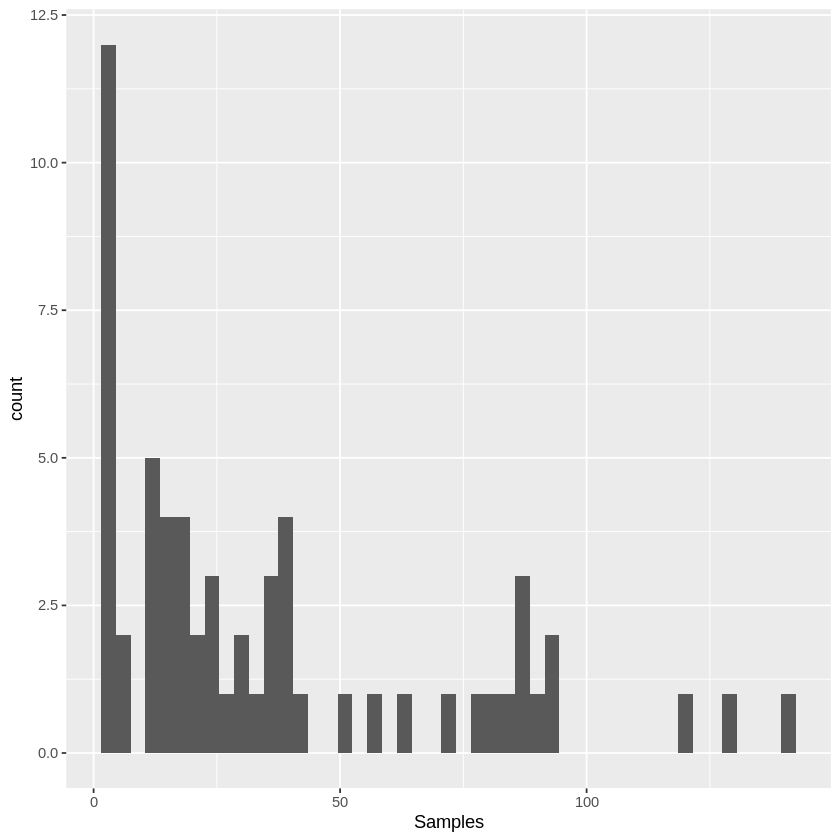

In [15]:
samples = rexp(60,rate=lambda)
df = data.frame(Samples = samples)
df |> ggplot() +geom_histogram(aes(x=Samples), bins = ,binwidth = 3)

B) what is the probability that a person will wait for less than 12 minutes ?

In [16]:
p12 = pexp(12, rate=lambda)
cat('The probability to wait less than 12 minuts is:', p12)

The probability to wait less than 12 minuts is: 0.32968

C) evaluate the average waiting time from the simulated data and compare it with the expected value
(calculated from theory and by manipulating the probability distributions using R)

In [17]:
empirical_avg = mean(samples)
theoretical_avg = 1/lambda
function_avg = integrate(function(x){x*dexp(x, rate=lambda)}, 0, Inf)

cat('Theoretical expected waiting time:',theoretical_avg,'\n')
cat('Empirical expected waiting time:',empirical_avg, '\n')
cat('Explicit computation of the expected waiting time:',function_avg$value)

Theoretical expected waiting time: 30 
Empirical expected waiting time: 36.50861 
Explicit computation of the expected waiting time: 30

D) what is the probability for waiting more than one hour before being received ?

In [18]:
p60 = 1-pexp(60, rate=lambda)
cat('The probability to wait more than one hour is:', p60)

The probability to wait more than one hour is: 0.1353353

# Exercise 4 - Multiple choices exams

• the final exam of a course is given to the students in the format of a multiple choice written test:
for each questions there are five possible alternatives

• a student either knows the answer, or selects randomly the answer among the five possible choices

• assuming p = 0.7 the probability that the student knows the answer, once a correct answer is given,
what it the probability that the student really knew the correct answer ?

• write a small R program to provide the answer

C: corrects answer       
W: wrong answer          
K:knows the answer     
DK: don't know the answer

N possible answers = 5


$P(K) = 0.7$     
$P(DK) = 1-P(k) = 0.3$

$P(C|K) = 1$        
$P(W|K) = 0$      
$P(C|DK) = 1/5$        
$P(W|DK) = 4/5$

$$P(K|C)=\frac{P(C|K)P(K)}{P(C|K)P(K) + P(C|DK)P(DK)}$$





In [26]:
pk = 0.7
pck=1
pcdk=1/5

pkc = (pck*pk)/(pck*pk + pcdk*(1-pk))
cat('The probability of kwoing the answer giveing that it is correct is:', pkc)

The probability of kwoing the answer giveing that it is correct is: 0.9210526

# Exercise 5 - Waiting time
• starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma
Termini. We assume there is always an available seat on a train leaving from Milano


• assuming a person arrives at a random time between 10:45 and 11:45 and compute the probability
that she has to wait

Since the person will arrive at a randomly picked time between 10:45 and 11:45 : in 50% of the cases they will fall in a temporal slot where the waiting time is less than 15 minutes, from 10:45 to 11:00 and from 11:30 to 11:45. We ramdomly pick $t \in [0, 60]$ and we can get two possible outcome: either we fall in the intervals were the average waiting time is 7.5 minutes or in the one were it is $15$ minutes, whith a probability 50/50.
We can than right the probability of an event $T$ as:
$$P(T) = P(T \lambda_1) + P(T\lambda_2)$$
$$P(T) = P(T|\lambda_1)P(\lambda_1) + P(T|\lambda_2) P(\lambda_2)$$
$P(\lambda_1) = P(\lambda_2) = 0.5$

In [20]:
Pl = 0.5 #same probability for lambda1 and lambda2
l1 = 1/7.5
l2 = 1/15

a) at most 10 minutes

In [21]:
P10 = pexp(10, rate=l1)*Pl + pexp(10, rate=l2)*Pl
cat('Probability To wait less than 10 minutes:', P10, 'min')

Probability To wait less than 10 minutes: 0.6114929 min

b) at least 15 minutes

In [22]:
P15 = 1- (pexp(15, rate=l1)*Pl + pexp(15, rate=l2)*Pl)
cat('Probability To wait more than 15 minutes:', P15, 'min')

Probability To wait more than 15 minutes: 0.2516074 min

c) what is the average time spent waiting ?

In [23]:
avg_T = integrate(function(t){t*(dexp(t, rate=l1)*0.5 + dexp(t, rate=l2)*0.5)}, 0, Inf)
cat('The average waiting time is: ', avg_T$value, 'min')

The average waiting time is:  11.25 min

# Exercise 6 - stock investment

• the annual return rate for a specific stock on the market is a normal variable with a 10% mean and       
a 12% standard deviation          
• Mr X decides to buy 200 share of that specific stock at a price of 85e per share            
• what is the probability that after a year his net profit from the investment is at least 800e ?           
• (suppose there are no transaction costs and that there are no annual dividend for the stock)

In [24]:
n_shares = 200
price_share = 85
stock_value = n_shares*price_share

mean = 0.1*stock_value
std = 0.12*stock_value

p800 =1- pnorm(800, mean=mean, sd=std)
cat('The probability of having a net profit of at least 800e is:', p800)

The probability of having a net profit of at least 800e is: 0.6704574